In [1]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

In [2]:
alldata, label_true = load_data('gaussian2d') #  'iris') #
feat_num = alldata.shape[1]
pca_painter = PaintPCA(alldata)
replay_painter = VisualiseReplay(alldata)
replay_num = 100
#plt.scatter(*alldata.T)

No PCA performed


Category 5 is too small
Category 6 is too small


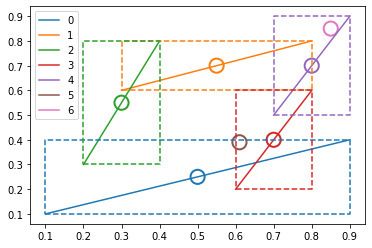

In [3]:
fig, ax = plt.subplots(1, 1)
# use FuzzyART
# init
rho = .5
net = FuzzyART(feat_num, rho=rho) 
net.w = np.array([[.1, .1, .1, .6],
                 [.3, .6, .2, .2],
                 [.2, .3, .6, .2],
                 [.6, .2, .2, .4],
                 [.7, .5, .1, .1],
                 [.61,.39,.39,.61],
                 [.85,.85,.15,.15]])
pca_painter.tripole(ax, *net.getcat_bipole())
ax.set_prop_cycle(None)
pca_painter.boundary(ax, net.getcat_vertex())
ax.legend(np.arange(net.w.shape[0]))

Category 5 is too small
Category 6 is too small
Category 5 is too small
Category 6 is too small
Directory  _simcache/unlearn_frames_2022-05-19_16-10-23  Created 
figure saved at _simcache/unlearn_frames_2022-05-19_16-10-23/2022-05-19_16-10-23_var_rho50[1652973023776533]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-19_16-10-23/2022-05-19_16-10-24_var_rho50[1652973024029856]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-19_16-10-23/2022-05-19_16-10-24_var_rho50[1652973024271717]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-19_16-10-23/2022-05-19_16-10-24_var_rho50[1652973024511078]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-19_16-10-23/2022-05-19_16-10-24_var_rho50[1652973024755424]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-19_1

Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-19_16-10-23/2022-05-19_16-10-36_var_rho50[1652973036746159]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-19_16-10-23/2022-05-19_16-10-37_var_rho50[1652973037037379]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-19_16-10-23/2022-05-19_16-10-37_var_rho50[1652973037264279]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-19_16-10-23/2022-05-19_16-10-37_var_rho50[1652973037487681]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-19_16-10-23/2022-05-19_16-10-37_var_rho50[1652973037711084]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-19_16-10-23/2022-05-19_16-10-37_var_rho50[1652973037940470]
Category 5 is too small
Category 6 is too small
figure sav

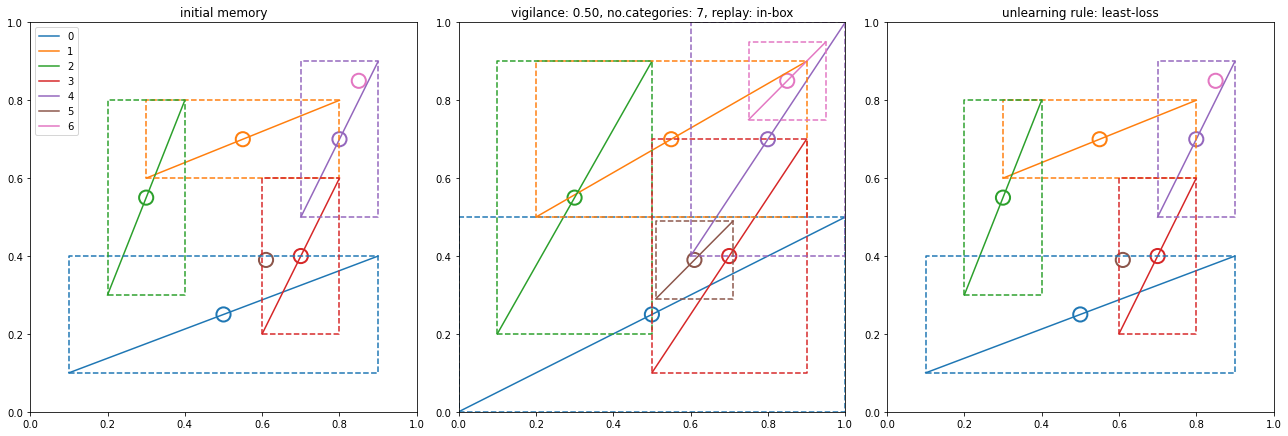

In [4]:
now = timestamp()[0]
np.random.shuffle(alldata)

no_epoch = 100
fig, ax = plt.subplot_mosaic('''
                                CAB
                                ''',
                                figsize = (18, 6))
fig.tight_layout()
    
# draw cats
truecats = pca_painter.tripole(ax['C'], *net.getcat_bipole())
ax['C'].set_prop_cycle(None)
pca_painter.boundary(ax['C'], net.getcat_vertex())
ax['C'].set_title('initial memory')
ax['C'].set_xlim(0, 1)
ax['C'].set_ylim(0, 1)
ax['C'].legend(np.arange(net.w.shape[0]))
    
replay_path = 'bottom-up'
replay_scheme = 'in-box'
unlearn_rule = 'least-loss'
std=-0.1
for epoch in range(no_epoch):
    # clear axes
    for key in 'AB':
        ax[key].cla()
    
    # draw cats
    pca_painter.tripole(ax['A'], *net.getcat_bipole(s=std))
    ax['A'].set_prop_cycle(None)
    pca_painter.boundary(ax['A'], net.getcat_vertex(s=std))
        
    # replay
    replay_sample, label_replay, label_test = net.replay_self_test(1, s=std, pathway=replay_path, conservative=False, scheme=replay_scheme)    
        
    new_sample = []
    for sample, label1, label2 in zip(replay_sample, label_replay, label_test):
        if label1 == label2:
            mt = 'o'
        else:
            mt = '${}$'.format(label1)
        
        for key in 'AB':
            new_sample.append(ax[key].scatter(*replay_sample.T, marker=mt, s=666, facecolor='none', edgecolor='k'))

    # unlearn
    net.unlearn_from_replay(replay_sample, label_replay, label_test, beta=1, whichidx=unlearn_rule)

    
                        
    
    # draw new cats
    pca_painter.tripole(ax['B'], *net.getcat_bipole())
    ax['B'].set_prop_cycle(None)
    pca_painter.boundary(ax['B'], net.getcat_vertex())
        
    # info
    cat_number = net.w.shape[0]
    ax['A'].set_title('vigilance: {:.2f}, no.categories: {}, replay: {}'.format(rho, cat_number, replay_scheme))
    ax['B'].set_title('unlearning rule: {}'.format(unlearn_rule))
    
    for key in 'AB':
        ax[key].set_xlim(0, 1)
        ax[key].set_ylim(0, 1)
    
    # save fig
    simname = 'var_rho{:d}'.format(int(rho*100))
    dirname = '_simcache/unlearn_frames_{}'.format(now)
    savefigure_datetime(fig, simname, dirname)
    
    [ns.remove() for ns in new_sample]

